# Exercise 1

In [49]:
# Importing modules
import sklearn
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

Loading dataset

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


Analyzing the dataset

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

Converting dataset to pandas dataframe

In [9]:
bos = pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


Splitting values into train and test datasets

In [15]:
X = bos
y = boston.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [18]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


# Exercise 2 - linear regression

In [20]:
lrmodel = LinearRegression()

In [21]:
lrmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = lrmodel.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

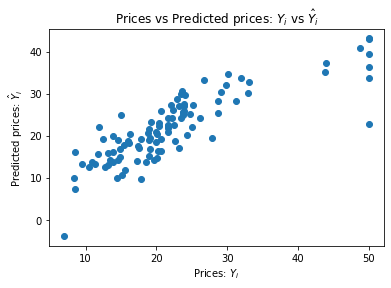

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Exercise 3 - mean squared error

In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

29.580192044619373

# Exercise 4 - calculating the score

In [30]:
lrmodel.score(X_test, y_test)

0.7012219700920348

The actual model score is low, using data standarization

In [32]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X = scaler.transform(X)

In [38]:
polynomial_features= PolynomialFeatures(degree=2)

In [39]:
X = polynomial_features.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [41]:
# Fitting and predictiong with new linear model
linmod = LinearRegression()

In [43]:
linmod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = linmod.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

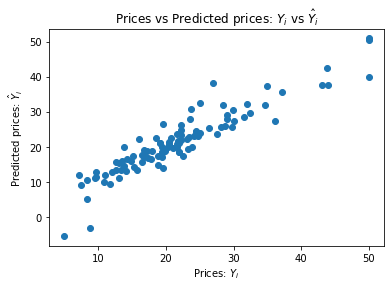

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

We can see that the the dependence between y predicted and target values is more pure linear-like


Calculating MSE and score

In [47]:
mse = mean_squared_error(y_pred, y_test)
mse

12.785983926642178

In [48]:
linmod.score(X_test, y_test)

0.8518753009555926

We can see that the model with standarization and poynomial features has improved

# Exercise 5 - lasso regularization

In [72]:
lasso = Lasso(alpha = 1.0)

In [73]:
# Fitting and prediction with Ridge model
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
y_pred = ridge.predict(X_test)

In [76]:
lasso.score(X_train, y_train)

0.772960798746424

In [77]:
lasso.score(X_test, y_test)

0.7572666148737678

In [107]:
alphas = np.logspace(-3, 4, 1000)
scores_train = np.zeros(len(alphas))
scores_test = np.zeros(len(alphas))

In [108]:
for i in range(len(alphas)):
    model = Lasso(alphas[i])
    model.fit(X_train, y_train)
    model.predict(X_test)
    scores_train[i] = model.score(X_train, y_train)
    scores_test[i] = model.score(X_test, y_test)

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 910.765167184041, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902.7606148142535, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897.0689174757688, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did no

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.74824814421163, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.91078694698456, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.5188101095998, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.68770847474138, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.82305776846124, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.8913674406815, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.78589930968587, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.37271577795173, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.22161324248009, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did n

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4733270259503115, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.900307358872396, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.350518709572498, tolerance: 3.3806128118811882
  positive)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

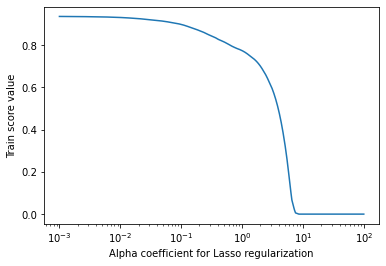

In [101]:
plt.plot(alphas, scores_train)
plt.xlabel('Alpha coefficient for Lasso regularization')
plt.ylabel('Train score value')
plt.xscale('log')

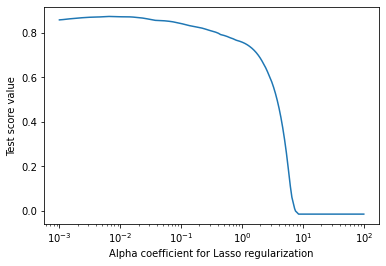

In [102]:
plt.plot(alphas, scores_test)
plt.xlabel('Alpha coefficient for Lasso regularization')
plt.ylabel('Test score value')
plt.xscale('log')

# Exercise 6 - Ridge regularization

In [50]:
ridge = Ridge(alpha = 1.0)

In [52]:
# Fitting and prediction with Ridge model
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
y_pred = ridge.predict(X_test)

In [57]:
ridge.score(X_train, y_train)

0.9326642634240739

In [56]:
ridge.score(X_test, y_test)

0.8669080899424839

Using loop to draw a plot of the score on the alpha parameters

In [103]:
alphas = np.logspace(-3, 4, 1000)
scores_train = np.zeros(len(alphas))
scores_test = np.zeros(len(alphas))

In [104]:
for i in range(len(alphas)):
    model = Ridge(alphas[i])
    model.fit(X_train, y_train)
    model.predict(X_test)
    scores_train[i] = model.score(X_train, y_train)
    scores_test[i] = model.score(X_test, y_test)

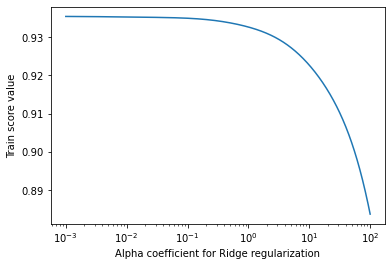

In [105]:
plt.plot(alphas, scores_train)
plt.xlabel('Alpha coefficient for Ridge regularization')
plt.ylabel('Train score value')
plt.xscale('log')

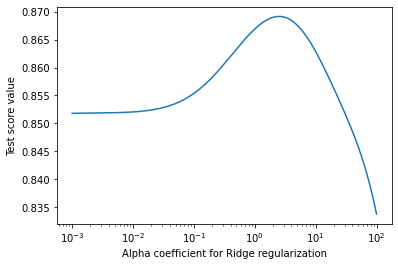

In [106]:
plt.plot(alphas, scores_test)
plt.xlabel('Alpha coefficient for Ridge regularization')
plt.ylabel('Test score value')
plt.xscale('log')

# Exercise 7 Regularization for logistic regression

In [36]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [37]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [38]:
wisconsinX = pd.DataFrame(data.data)
wisconsinY = data.target

In [39]:
wisconsinX.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
wisconsinX.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

There are no null (empty values)

Removing ID column from the dataset

In [41]:
wisonsinX = wisconsinX.drop(labels=0, axis = 'columns')
wisonsinX.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
wisconsinX = StandardScaler().fit_transform(wisconsinX)

Splitting the dataset into train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(wisconsinX, wisconsinY, test_size = 0.2, shuffle = True)

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, penalty='l1', solver='saga')

In [45]:
logreg.fit(X_train, y_train)

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)

In [51]:
cs = np.logspace(-4, 0, 10)
scores = []
for c in cs:
    logreg = LogisticRegression(C=c, penalty='l2', solver='saga')
    logreg.fit(X_train, y_train)
    scores.append(logreg.score(X_test, y_test))

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


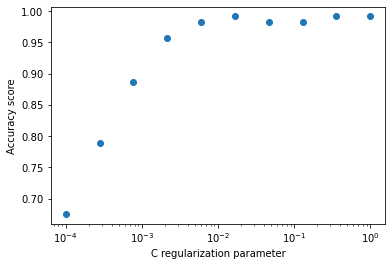

In [52]:
plt.scatter(cs, scores)
plt.xlabel("C regularization parameter")
plt.ylabel("Accuracy score")
plt.xscale("log")

# Regularization for kNN method

In [53]:
from sklearn import datasets
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [87]:
iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.4)

In [88]:
features_train.shape

(90, 4)

In [89]:
def calculate_pred_kNN(k, features_train, labels_train, features_test):
    predictions = list()
    for i in features_test:
        distances = list()
        for j,h in zip(features_train, labels_train):
            distances.append((j, distance.euclidean(i, j), h))
        distances.sort(key = lambda tup: tup[1])
        neighbours = list()
        for h in range(k):
            neighbours.append((distances[h][0], distances[h][2]))
        output_vals = [row[-1] for row in neighbours]
        predictions.append(max(set(output_vals), key=output_vals.count))
    return predictions

In [104]:
ks = np.linspace(1, 20)
ks = ks.astype(int)
ks = set(ks)
ks = list(ks)

In [105]:
accuracy_scores = []
for k in ks:
    pred_y = calculate_pred_kNN(k, features_train, labels_train, features_test)
    accuracy_scores.append(accuracy_score(labels_test, pred_y))

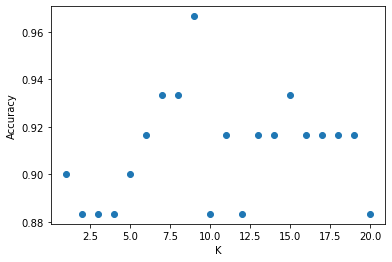

In [106]:
plt.scatter(ks, accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

Finding k with biggest accuracy score

In [108]:
ks[accuracy_scores.index(max(accuracy_scores))]

9

# Decision trees optimization 

In [117]:
from scipy.io import loadmat
from sklearn import tree

In [110]:
# input data
dane = loadmat('mnist.mat')

In [111]:
X = dane['X']
y = dane['y']

Data standarization

In [112]:
X = StandardScaler().fit_transform(X)

In [113]:
y[np.where(y==10)]=0

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7535)

In [125]:
depths = np.linspace(1, 50)
accuracy_scores = []

In [126]:
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    accuracy_scores.append(clf.score(X_test, y_test))

Text(0, 0.5, 'Accuracy score')

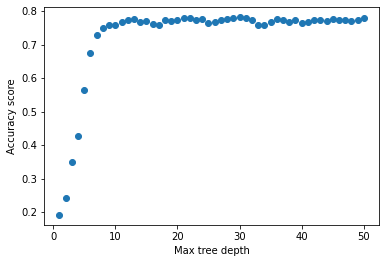

In [127]:
plt.scatter(depths, accuracy_scores)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy score')

Finding tree depth witth biggest accuracy score

In [129]:
depths[accuracy_scores.index(max(accuracy_scores))]

30.0